In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#from bokeh.models import ColumnDataSource, CategoricalColorMapper
#from bokeh.plotting import figure, show, output_file
#from bokeh.io import output_notebook
#from bokeh.layouts import column, row
#from IPython.display import HTML

from sklearn import svm, metrics, linear_model
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Absenteeism_at_work_AAA/Absenteeism_at_work.csv', sep=';')

Attribute Information:

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases  
II Neoplasms  
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
IV Endocrine, nutritional and metabolic diseases  
V Mental and behavioural disorders  
VI Diseases of the nervous system  
VII Diseases of the eye and adnexa  
VIII Diseases of the ear and mastoid process  
IX Diseases of the circulatory system  
X Diseases of the respiratory system  
XI Diseases of the digestive system  
XII Diseases of the skin and subcutaneous tissue  
XIII Diseases of the musculoskeletal system and connective tissue  
XIV Diseases of the genitourinary system  
XV Pregnancy, childbirth and the puerperium  
XVI Certain conditions originating in the perinatal period  
XVII Congenital malformations, deformations and chromosomal abnormalities  
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
XIX Injury, poisoning and certain other consequences of external causes  
XX External causes of morbidity and mortality  
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [4]:
new_cols = list()
for col in data.columns:
    words = col.lower().split()
    new_cols.append('_'.join(words))

data.columns = new_cols

In [5]:
data.iloc[:,:10].head(7)

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day
0,11,26,7,3,1,289,36,13,33,239.554
1,36,0,7,3,1,118,13,18,50,239.554
2,3,23,7,4,1,179,51,18,38,239.554
3,7,7,7,5,1,279,5,14,39,239.554
4,11,23,7,5,1,289,36,13,33,239.554
5,3,23,7,6,1,179,51,18,38,239.554
6,10,22,7,6,1,361,52,3,28,239.554


In [6]:
data.iloc[:,10:].head(7)

,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,97,0,1,2,1,0,1,90,172,30,4
1,97,1,1,1,1,0,0,98,178,31,0
2,97,0,1,0,1,0,0,89,170,31,2
3,97,0,1,2,1,1,0,68,168,24,4
4,97,0,1,2,1,0,1,90,172,30,2
5,97,0,1,0,1,0,0,89,170,31,2
6,97,0,1,1,1,0,4,80,172,27,8


In [7]:
print(data.shape)
print(data['id'].value_counts()[:10])

(740, 21)
3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
Name: id, dtype: int64


In [8]:
sns.set()

In [9]:
day_group = data.groupby('day_of_the_week')[['day_of_the_week']].count()
day_group.columns = ['count']
print(day_group)

                 count
day_of_the_week       
2                  161
3                  154
4                  156
5                  125
6                  144


In [10]:
reason_counts = data.groupby(['reason_for_absence'])[['reason_for_absence']].count()
reason_counts.columns = ['count']

#data['str_reason'] = data['reason_for_absence'].apply(str)
abs_hour_reason = data.groupby(['reason_for_absence'])[['absenteeism_time_in_hours']]

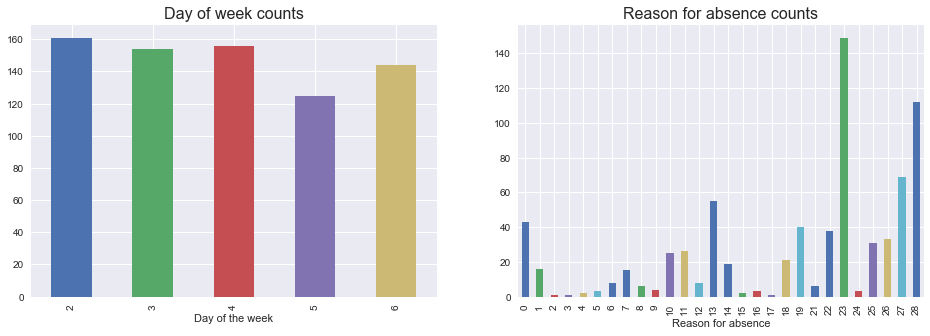

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(5)

day_ax = day_group.unstack().plot.bar(ax=axes[0])
day_ax.set_xlabel('Day of the week')
day_ax.set_xticklabels(day_group.index)
day_ax.set_title('Day of week counts', fontsize=16)

reason_ax = reason_counts.unstack().plot.bar(ax=axes[1])
reason_ax.set_xlabel('Reason for absence')
reason_ax.set_xticklabels(reason_counts.index)
reason_ax.set_title('Reason for absence counts', fontsize=16)

plt.show()

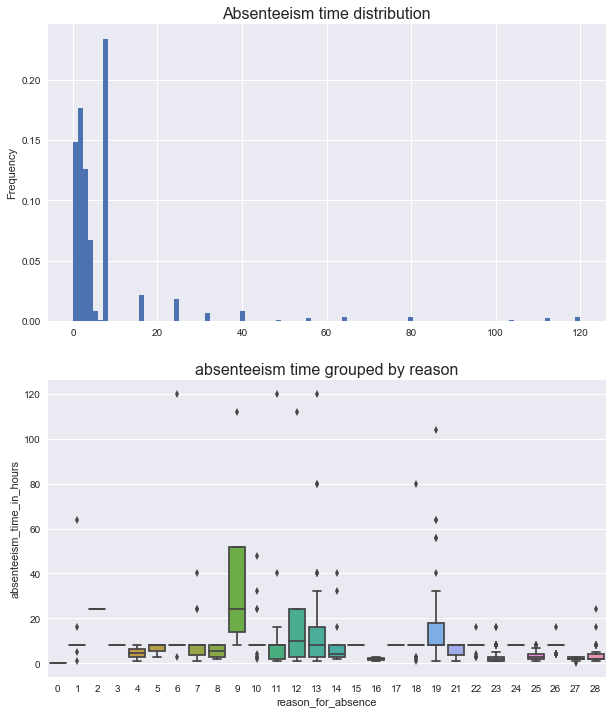

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_figwidth(10)
fig.set_figheight(12)

ax1 = data['absenteeism_time_in_hours'].plot.hist(bins=100, density=True, ax=axes[0])
ax1.set_title('Absenteeism time distribution', fontsize=16)

ax2 = sns.boxplot(x='reason_for_absence', y='absenteeism_time_in_hours', data=data, ax=axes[1])
ax2.set_title('absenteeism time grouped by reason', fontsize=16)
plt.show()

One promising and seemingly directly related to absenteeism time is reason for the absence. Worth exploring.

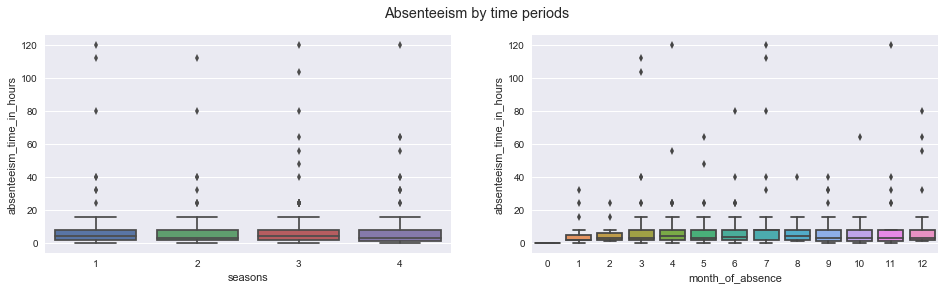

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16)

sns.boxplot(x='seasons', y='absenteeism_time_in_hours', data=data, ax=axes[0])

sns.boxplot(x='month_of_absence', y='absenteeism_time_in_hours', data=data, ax=axes[1])

fig.suptitle('Absenteeism by time periods')
plt.show()

No obvious temporal patterns of absenteeism time

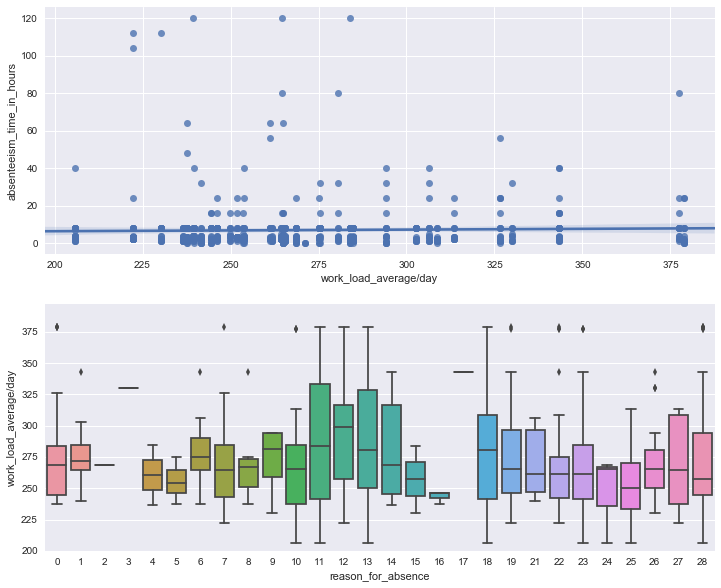

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_figwidth(12)
fig.set_figheight(10)

sns.regplot(x='work_load_average/day', y='absenteeism_time_in_hours', data=data, ax=axes[0])

ax = sns.boxplot(x='reason_for_absence', y='work_load_average/day', data=data, ax=axes[1])
ax.set_ylim(200)

plt.show()

There's a variation in work_load_average when grouped by reason for absence. However, there's not much of correlation between work_load_average and absenteeism time.

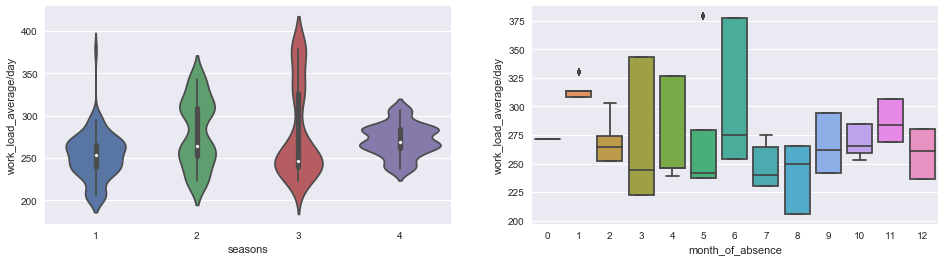

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16)

sns.violinplot(x='seasons', y='work_load_average/day', data=data, ax=axes[0])
sns.boxplot(x='month_of_absence', y='work_load_average/day', data=data, ax=axes[1])

plt.show()

There's a certain variation in work_load_average respecting to different period of time

## Effects of drinking and smoking

In [16]:
print(data['social_drinker'].value_counts())
print(data['social_smoker'].value_counts())
print(data['disciplinary_failure'].value_counts())

1    420
0    320
Name: social_drinker, dtype: int64
0    686
1     54
Name: social_smoker, dtype: int64
0    700
1     40
Name: disciplinary_failure, dtype: int64


In [17]:
def merge_drink_smoke(row):
    if row['social_drinker'] == row['social_smoker'] == 0:
        return 0
    elif row['social_drinker'] == 1 and row['social_smoker'] == 0:
        return 1
    elif row['social_drinker'] == 0 and row['social_smoker'] == 1:
        return 2
    elif row['social_drinker'] == row['social_smoker'] == 1:
        return 3
    
data['drink_smoke'] = data.apply(merge_drink_smoke, axis=1)

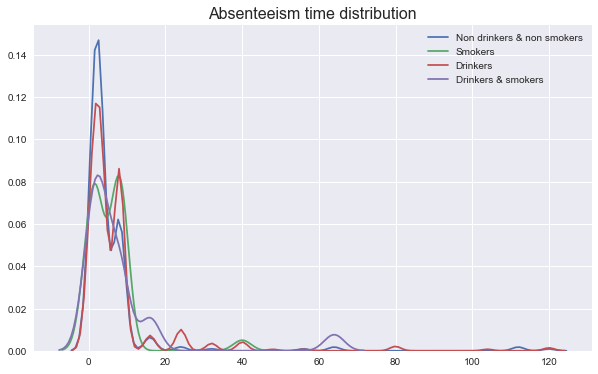

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figwidth(10)
fig.set_figheight(6)

ax1 = sns.kdeplot(data[np.logical_and(data['social_drinker'] == 0,
                                      data['social_smoker'] == 0)]['absenteeism_time_in_hours'],
                  label='Non drinkers & non smokers', ax=axes)
ax1 = sns.kdeplot(data[np.logical_and(data['social_drinker'] == 0,
                                      data['social_smoker'] == 1)]['absenteeism_time_in_hours'],
                  label='Smokers', ax=axes)
ax1 = sns.kdeplot(data[np.logical_and(data['social_drinker'] == 1,
                                      data['social_smoker'] == 0)]['absenteeism_time_in_hours'],
                  label='Drinkers', ax=axes)
ax1 = sns.kdeplot(data[np.logical_and(data['social_drinker'] == 1,
                                      data['social_smoker'] == 1)]['absenteeism_time_in_hours'],
                  label='Drinkers & smokers', ax=axes)
ax1.set_title('Absenteeism time distribution', fontsize=16)

plt.show()

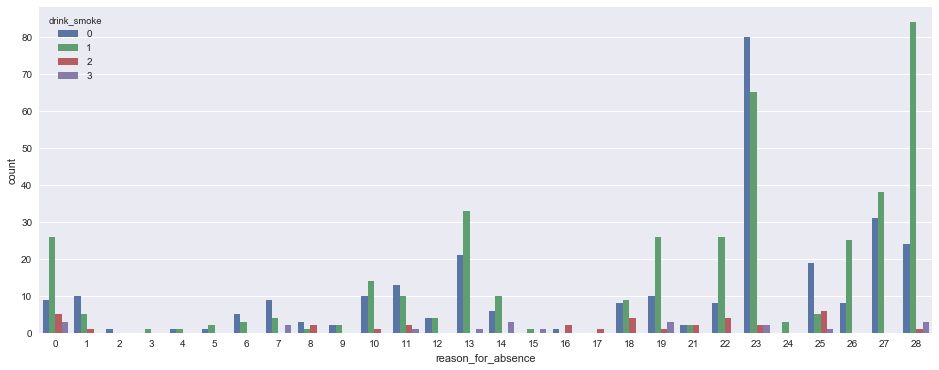

In [19]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(6)
sns.countplot(x='reason_for_absence', hue='drink_smoke', data=data)
plt.show()

In [20]:
density_function = lambda x: x/float(x.sum())

In [21]:
rds_group = data.groupby(['reason_for_absence', 'drink_smoke'])['id'].count()
rds_ratio_group = rds_group.groupby('drink_smoke').apply(density_function)

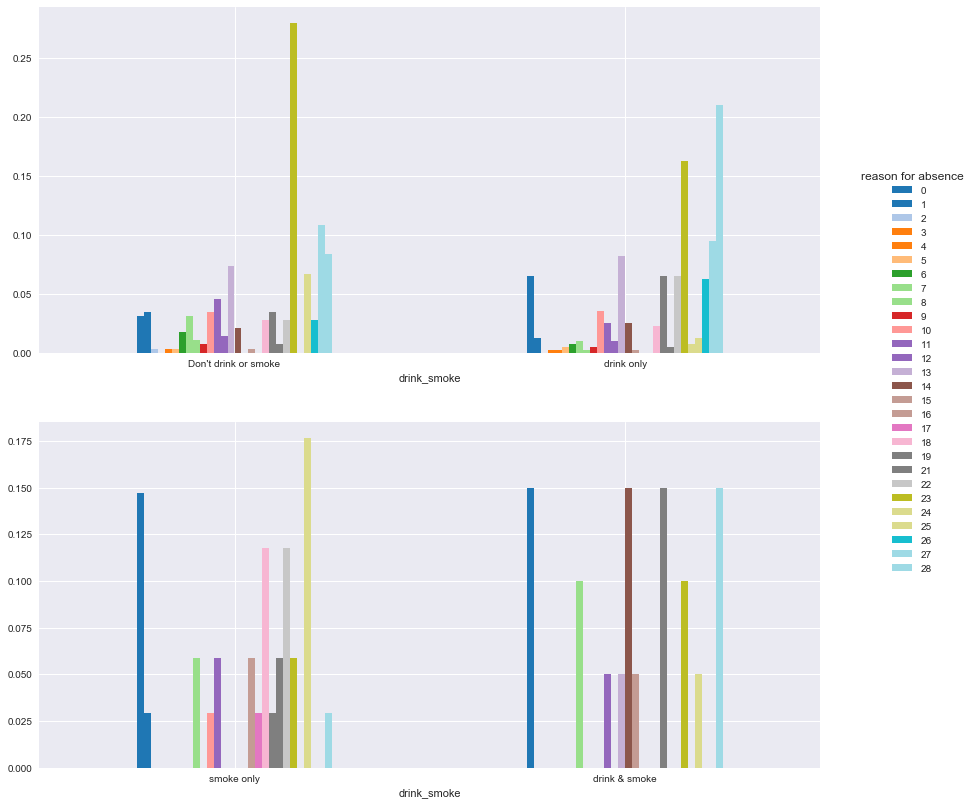

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_figwidth(14)
fig.set_figheight(14)

ax = rds_ratio_group.unstack('reason_for_absence')[:2].fillna(0).plot.bar(cmap='tab20', ax=axes[0])
ax.set_xticklabels(["Don't drink or smoke", 'drink only'], rotation=0)
ax.legend_.remove()

ax = rds_ratio_group.unstack('reason_for_absence')[2:].fillna(0).plot.bar(cmap='tab20', ax=axes[1])
ax.set_xticklabels(['smoke only', 'drink & smoke'], rotation=0)
ax.legend(title='reason for absence', bbox_to_anchor=(1.04,1.75), loc="upper left")

plt.show()

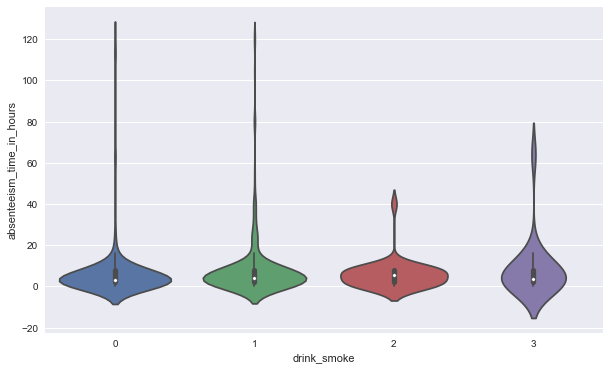

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figwidth(10)
fig.set_figheight(6)

sns.violinplot(x='drink_smoke', y='absenteeism_time_in_hours', data=data, ax=axes)

plt.show()

## Distance and transportation expense

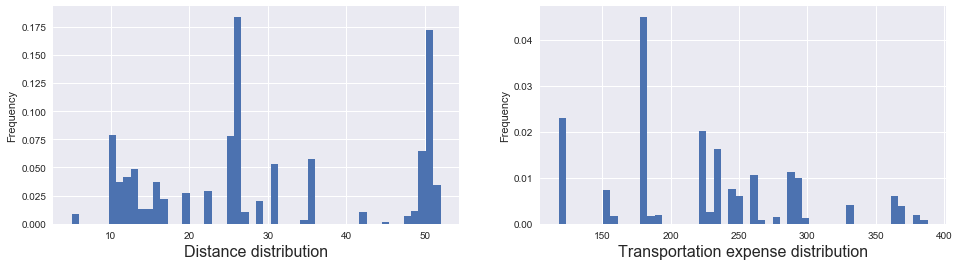

In [24]:
fig = plt.figure()
fig.set_figwidth(16)

plt.subplot(121)
ax1 = data['distance_from_residence_to_work'].plot.hist(bins=50, density=True)
ax1.set_xlabel('Distance distribution', fontsize=16)

plt.subplot(122)
ax2 = data['transportation_expense'].plot.hist(bins=50, density=True)
ax2.set_xlabel('Transportation expense distribution', fontsize=16)

plt.show()

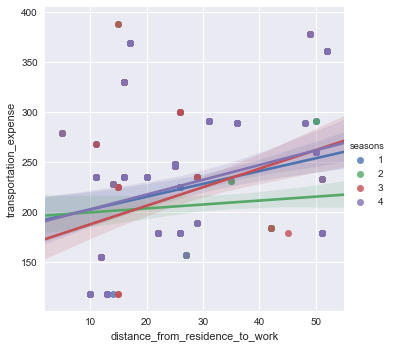

In [25]:
sns.lmplot(x='distance_from_residence_to_work', y='transportation_expense', hue='seasons', data=data)
plt.show()